In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
import seaborn as sns
import statsmodels
import statsmodels.api as sm

In [2]:
df=pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Checking Unique Values

In [3]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [4]:
df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [5]:
df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [6]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

# Data Cleaning

In [7]:
df.Additional_Info=df.Additional_Info.replace('No Info','No info')

In [8]:
df.drop(columns=['Route'],inplace=True)

In [9]:
df.drop(columns=['Dep_Time','Arrival_Time'],inplace=True)

In [10]:
#df.drop(columns=['Date_of_Journey'],inplace=True)

In [11]:
df.Destination.replace('New Delhi','Delhi',inplace=True)

In [12]:
df.replace('Delhi',1,inplace=True)
df.replace('Banglore',2,inplace=True)
df.replace('Cochin',3,inplace=True)
df.replace('Kolkata',4,inplace=True)
df.replace('Hyderabad',5,inplace=True)
df.replace('Chennai',6,inplace=True)
df.replace('Hyderabad',7,inplace=True)

In [13]:
df.replace('Mumbai',8,inplace=True)

In [14]:
df.Destination.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [15]:
df.Source.unique()

array([2, 4, 1, 6, 8], dtype=int64)

In [16]:
df.Total_Stops.isnull().sum()

1

In [17]:
df.dropna(inplace=True)

In [18]:
df.Total_Stops.replace('non-stop','0 stop',inplace=True)

In [19]:
df.Total_Stops=df.Total_Stops.apply(lambda x: int(x.split(' ')[0]))

# Creating Dummy Variables

In [20]:
df = pd.get_dummies(df, columns=['Total_Stops'],drop_first=True)
#TS_dummy=pd.get_dummies(df.Total_Stops,prefix="Total_Stops")
#TS_dummy

In [21]:
df = pd.get_dummies(df, columns=['Source'],drop_first=True)
df = pd.get_dummies(df, columns=['Destination'],drop_first=True)

In [22]:
df = pd.get_dummies(df, columns=['Additional_Info'],drop_first=True)

In [23]:
h = df['Duration'].str.extract('(\d+)h', expand=False).astype(float) * 60
m = df['Duration'].str.extract('(\d+)m', expand=False).astype(float)
df['Duration'] = h.add(m, fill_value=0).astype(int)

In [24]:
df.Duration=df.Duration.astype(float)

In [25]:
df.Price=df.Price.astype(float)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Airline                                       10682 non-null  object 
 1   Date_of_Journey                               10682 non-null  object 
 2   Duration                                      10682 non-null  float64
 3   Price                                         10682 non-null  float64
 4   Total_Stops_1                                 10682 non-null  uint8  
 5   Total_Stops_2                                 10682 non-null  uint8  
 6   Total_Stops_3                                 10682 non-null  uint8  
 7   Total_Stops_4                                 10682 non-null  uint8  
 8   Source_2                                      10682 non-null  uint8  
 9   Source_4                                      10682 non-null 

In [27]:
df.Date_of_Journey=df.Date_of_Journey.astype('datetime64[ns]')

In [28]:
df

,Airline,Date_of_Journey,Duration,Price,Total_Stops_1,Total_Stops_2,Total_Stops_3,Total_Stops_4,Source_2,Source_4,...,Destination_4,Destination_5,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,IndiGo,2019-03-24,170.0,3897.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,Air India,2019-01-05,445.0,7662.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,Jet Airways,2019-09-06,1140.0,13882.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,IndiGo,2019-12-05,325.0,6218.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,IndiGo,2019-01-03,285.0,13302.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,150.0,4107.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
10679,Air India,2019-04-27,155.0,4145.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
10680,Jet Airways,2019-04-27,180.0,7229.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
10681,Vistara,2019-01-03,160.0,12648.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:xlabel='Duration', ylabel='Price'>

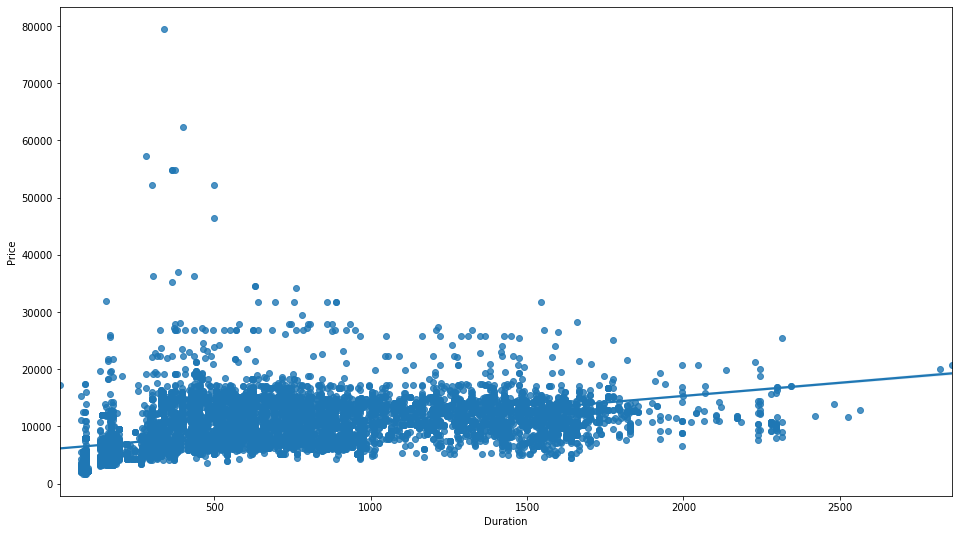

In [29]:
plt.figure(figsize= (16,9))
sns.regplot(x ="Duration", y ="Price",data = df)

<AxesSubplot:>

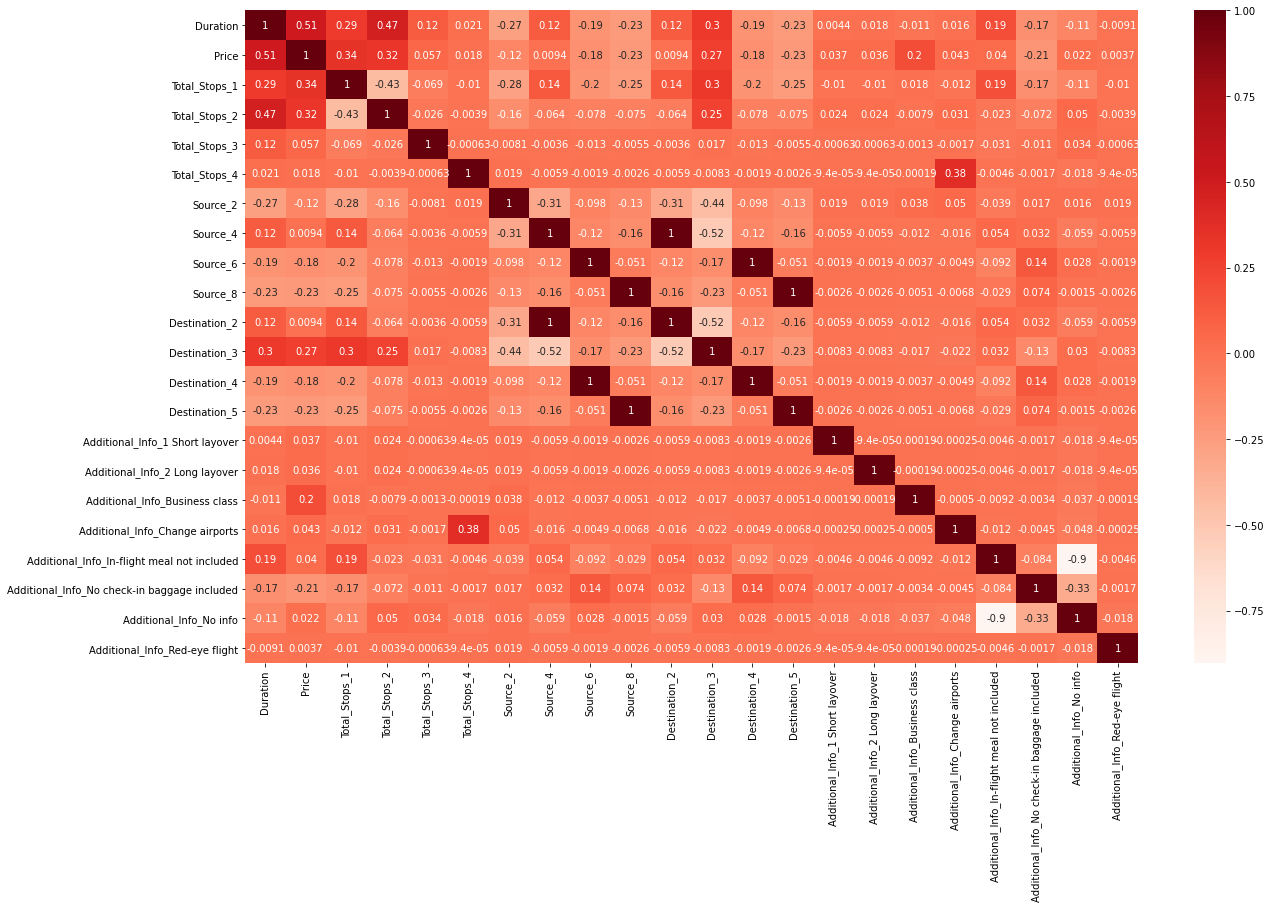

In [30]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Airline                                       10682 non-null  object        
 1   Date_of_Journey                               10682 non-null  datetime64[ns]
 2   Duration                                      10682 non-null  float64       
 3   Price                                         10682 non-null  float64       
 4   Total_Stops_1                                 10682 non-null  uint8         
 5   Total_Stops_2                                 10682 non-null  uint8         
 6   Total_Stops_3                                 10682 non-null  uint8         
 7   Total_Stops_4                                 10682 non-null  uint8         
 8   Source_2                                      10682 non-null  uint

# Feature Selection

In [32]:
X=df
X = X.drop(["Price","Airline","Date_of_Journey"],1)
X
#,19,20,21,22,23,24,25,26,27

,Duration,Total_Stops_1,Total_Stops_2,Total_Stops_3,Total_Stops_4,Source_2,Source_4,Source_6,Source_8,Destination_2,...,Destination_4,Destination_5,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,170.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,445.0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1140.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,325.0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,285.0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,150.0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
10679,155.0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
10680,180.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10681,160.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [34]:
y = np.log(df.Price)
y

0        8.267962
1        8.944028
2        9.538348
3        8.735204
4        9.495670
           ...   
10678    8.320448
10679    8.329658
10680    8.885856
10681    9.445254
10682    9.371864
Name: Price, Length: 10682, dtype: float64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Linear Regression

In [36]:
reg = linear_model.LinearRegression() 
reg.fit(X_train, y_train) 
y_pre=reg.predict(X_test)

In [37]:
reg.score(X_test, y_test)

0.6115904819332105

# RFE

In [38]:
from sklearn.feature_selection import RFE

In [39]:
rfe = RFE(reg, 14)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=14 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[('Duration', False, 8),
 ('Total_Stops_1', True, 1),
 ('Total_Stops_2', True, 1),
 ('Total_Stops_3', True, 1),
 ('Total_Stops_4', True, 1),
 ('Source_2', True, 1),
 ('Source_4', True, 1),
 ('Source_6', True, 1),
 ('Source_8', True, 1),
 ('Destination_2', True, 1),
 ('Destination_3', True, 1),
 ('Destination_4', True, 1),
 ('Destination_5', True, 1),
 ('Additional_Info_1 Short layover', False, 6),
 ('Additional_Info_2 Long layover', False, 5),
 ('Additional_Info_Business class', True, 1),
 ('Additional_Info_Change airports', False, 4),
 ('Additional_Info_In-flight meal not included', False, 2),
 ('Additional_Info_No check-in baggage included', True, 1),
 ('Additional_Info_No info', False, 3),
 ('Additional_Info_Red-eye flight', False, 7)]

In [40]:
rfe.score(X_test, y_test)

0.6027521222201947

In [41]:
col = X_train.columns[rfe.support_]
col

Index(['Total_Stops_1', 'Total_Stops_2', 'Total_Stops_3', 'Total_Stops_4',
       'Source_2', 'Source_4', 'Source_6', 'Source_8', 'Destination_2',
       'Destination_3', 'Destination_4', 'Destination_5',
       'Additional_Info_Business class',
       'Additional_Info_No check-in baggage included'],
      dtype='object')

In [42]:
X_train.columns[~rfe.support_]

Index(['Duration', 'Additional_Info_1 Short layover',
       'Additional_Info_2 Long layover', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No info', 'Additional_Info_Red-eye flight'],
      dtype='object')

In [43]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [44]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [45]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [46]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     1037.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:10:25   Log-Likelihood:                -2347.1
No. Observations:                7477   AIC:                             4716.
Df Residuals:                    7466   BIC:                             4792.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

# VIF

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
5,Source_2,inf
6,Source_4,inf
7,Source_6,inf
8,Source_8,inf
9,Destination_2,inf
10,Destination_3,inf
11,Destination_4,inf
12,Destination_5,inf
1,Total_Stops_1,2.22
2,Total_Stops_2,1.84


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

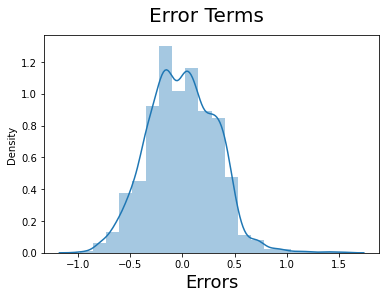

In [48]:
lr_predict = y_pre
fig = plt.figure()
sns.distplot((y_test - lr_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  